In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Chennai_house_univariate_train.csv')
dataset.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [3]:
dataset.shape

(97, 2)

In [4]:
dataset.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


In [5]:
###Check if features and target have a linear relationship

C:\Users\Lenovo y540 bnin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


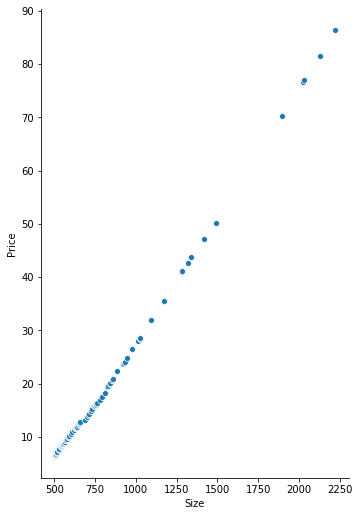

In [6]:
import seaborn as sns
sns.pairplot(dataset, x_vars=['Size'], y_vars='Price',size=7, aspect=0.7, kind='scatter')

In [7]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [8]:
### Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [9]:
X_train.shape

(77, 1)

In [10]:
X_train.ndim

2

In [11]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

In [12]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-17.565922299801866
[0.04602718]


In [14]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [20]:
np.where(y_test!=y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,10.5,10.059593
1,16.0,17.132130
2,10.1,9.552374
3,50.2,51.051403
4,12.4,12.288230
5,15.3,16.192716
6,19.5,20.606262
7,41.1,41.514571
8,47.1,47.626981
9,16.0,17.139495


Text(0, 0.5, 'Predicted Y')

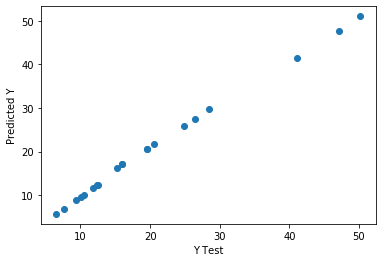

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.7053632681514533
r_square_value : 0.9954441689113477


In [21]:
print("Accuracy:{}",r2_score(y_test, y_pred)*100)

Accuracy:{} 99.54441689113477
